# Iris Data Analysis
**Student:** Gloria Baker 
**Objective:** Load and analyze the Iris dataset using pandas and visualize with matplotlib / seaborn.


In [2]:
# Imports and quick check that iris.csv is available
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Current working directory:", os.getcwd())
print("Files here:", os.listdir('.'))


Current working directory: C:\Users\User\Desktop\Python\plp-python-week7
Files here: ['.ipynb_checkpoints', 'iris.csv', 'iris_analysis.ipynb']


In [3]:
# Load the CSV with error handling
try:
    df = pd.read_csv("iris.csv")
    print("✅ iris.csv loaded successfully")
except FileNotFoundError:
    print("❌ iris.csv not found — make sure the file is in the same folder as this notebook")
    raise

# Show first rows
df.head()


✅ iris.csv loaded successfully


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Data structure, types and missing values
df.info()
print("\nMissing values per column:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

Missing values per column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [5]:
# Clean dataset (Iris has no missing values, but we include code as required)
if df.isnull().values.any():
    # Option A: drop missing rows
    df = df.dropna()
    # Option B (alternative): fill missing values with mean:
    # df = df.fillna(df.mean())
    print("Missing values handled.")
else:
    print("No missing values found.")


No missing values found.


In [6]:
# Basic statistics for numerical columns
df.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Group by species and compute mean petal length
grouped = df.groupby("species")["petal_length"].mean().reset_index()
grouped


,species,petal_length
0,setosa,1.462
1,versicolor,4.260
2,virginica,5.552


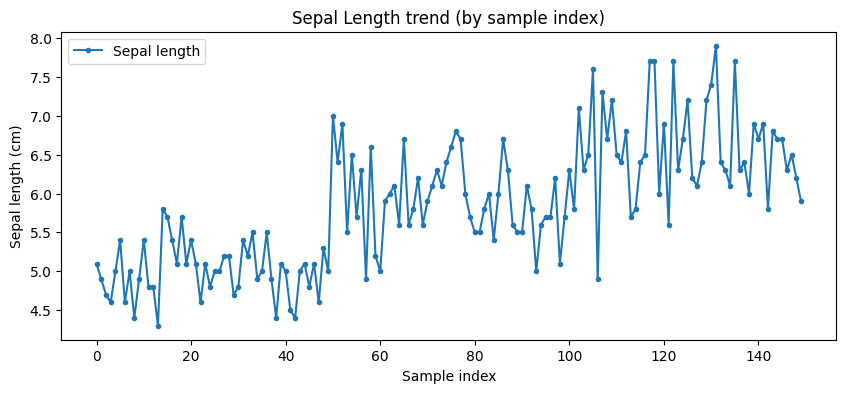

In [8]:
# Line chart - sepal length over sample index
plt.figure(figsize=(10,4))
plt.plot(df.index, df["sepal_length"], marker='.', linestyle='-', color='tab:blue', label='Sepal length')
plt.title("Sepal Length trend (by sample index)")
plt.xlabel("Sample index")
plt.ylabel("Sepal length (cm)")
plt.legend()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_20896\3564009405.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x='species', y='petal_length', palette='pastel')


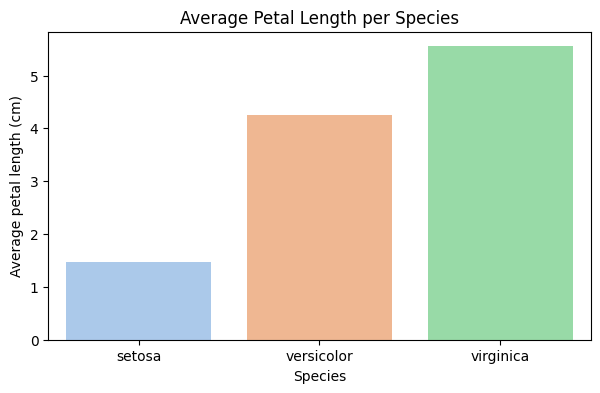

In [9]:
# Bar chart - average petal length per species
plt.figure(figsize=(7,4))
sns.barplot(data=grouped, x='species', y='petal_length', palette='pastel')
plt.title("Average Petal Length per Species")
plt.xlabel("Species")
plt.ylabel("Average petal length (cm)")
plt.show()


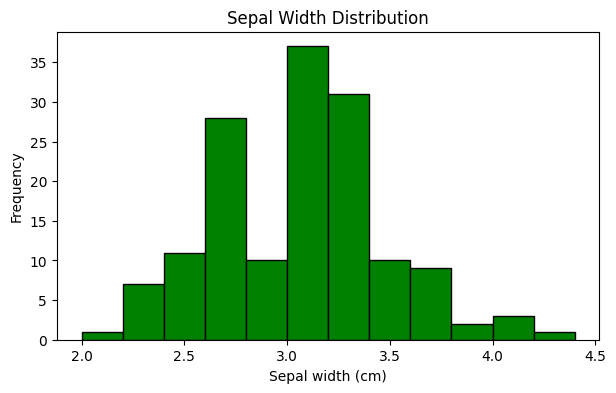

In [10]:
# Histogram of sepal width
plt.figure(figsize=(7,4))
plt.hist(df["sepal_width"], bins=12, edgecolor='black', color='green')
plt.title("Sepal Width Distribution")
plt.xlabel("Sepal width (cm)")
plt.ylabel("Frequency")
plt.show()


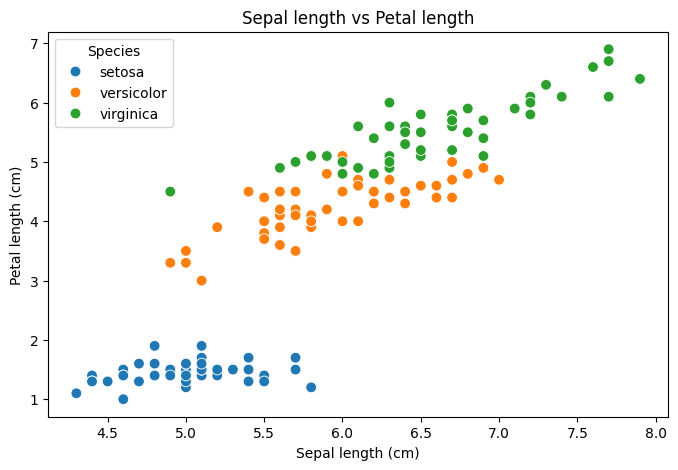

In [11]:
# Scatter plot - sepal length vs petal length by species
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='sepal_length', y='petal_length', hue='species', s=60)
plt.title("Sepal length vs Petal length")
plt.xlabel("Sepal length (cm)")
plt.ylabel("Petal length (cm)")
plt.legend(title='Species')
plt.show()


## Findings and Observations

- The dataset loaded cleanly and had no missing values.
- Average petal length by species (Setosa < Versicolor < Virginica).
- Sepal width distribution is roughly concentrated between 2.5 and 3.5 cm.
- There is a clear positive relationship between sepal length and petal length (see scatter plot).
